<a href="https://colab.research.google.com/github/rderakhshan/Pyspark/blob/main/The_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
# Installing Pyspark

!pip install pyspark

Importing the modules 

In [14]:
# Importing required libraries

import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, isnan , col, max , struct

creating spark session

In [5]:
# Creating spark session

spark = SparkSession.builder.appName('Bigdata-cleaning').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [7]:
# Loading data in csv format

listening_df = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv', \
                                              header = True, inferSchema = True)

In [9]:
# Printing head of dataframe with is's shape

listening_df.show()
print('The shape of a given dataframe is ({}, {})'.format(listening_df.count(),\
                                                         len(listening_df.columns)))

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

In [11]:
# Statistical summary of given dataset

# listening_df.summary()

# Task 3 :
Agiven dataset should be checked against null values:

In [20]:
# Printing the number of rows with at least one null value


('The number of rows with null values is {}'.format(listening_df.count() - \
                                                    listening_df.dropna().count()))

'The number of rows with null values is 891689'

# Task 4 :
Drop the null rows and let's check the dataset again:

In [22]:
# Droping the rows with at least one value

listening_df  = listening_df.dropna()
listening_df.show()
print('The shape of a given dataframe is ({}, {})'.format(listening_df.count(), len(listening_df.columns)))

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

# Task 5:
Check the data types for a given variables

In [24]:
# Print the schema of dataset

listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



# Task 6:

**Exe #0:**
select two columns: track and artist

In [25]:
# Task 3:
listening_df.select('track', 'artist').show(10, truncate = False)

+--------------------------------------------+------------+
|track                                       |artist      |
+--------------------------------------------+------------+
|Price Tag                                   |Jessie J    |
|Price Tag (Acoustic Version)                |Jessie J    |
|Be Mine! (Ballad Version)                   |Robyn       |
|Acapella                                    |Kelis       |
|I'm Not Invisible                           |The Tease   |
|Bounce (Feat NORE + ISIS)                   |MSTRKRFT    |
|Don't Stop The Music (Wideboys Bassline Mix)|Rihanna     |
|ObZen                                       |Meshuggah   |
|Yama's Messengers                           |Gojira      |
|On the Brink of Extinction                  |Napalm Death|
+--------------------------------------------+------------+
only showing top 10 rows



**Exe #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [27]:
# Extracting those rows which listened to Rihanna

df_rihann = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
df_rihann.show(10, truncate = False)

+-----------+-------------+--------------------------------------------+-------+-------------------------------+
|user_id    |date         |track                                       |artist |album                          |
+-----------+-------------+--------------------------------------------+-------+-------------------------------+
|000Silenced|1294498440000|Don't Stop The Music (Wideboys Bassline Mix)|Rihanna|Addicted 2 Bassline CD1        |
|000Silenced|1285438440000|Disturbia                                   |Rihanna|Good Girl Gone Bad: The Remixes|
|00williamsl|1361485800000|Hatin On The Club                           |Rihanna|Random                         |
|00williamsl|1361485800000|Hatin On The Club                           |Rihanna|Random                         |
|00williamsl|1361048640000|Complicated                                 |Rihanna|Loud                           |
|00williamsl|1360439280000|What's My Name (feat Drake)                 |Rihanna|Loud            

**Exe #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [29]:
# Limiting the output of quiery up to top ten

# Pandas way
# df_rihann = df[df['artist'] == 'Rihanna'].show(10, truncate = False)
# Pyspark way
df_rihann = listening_df.select('*').filter(listening_df.artist == 'Rihanna').\
                          groupby('user_id').count().orderBy(desc('count')).limit(10)
df_rihann.show(truncate = False)


+---------------+-----+
|user_id        |count|
+---------------+-----+
|thiessu        |179  |
|eyessetkyle    |166  |
|adxx           |164  |
|missnumberthree|156  |
|helloiamnatalie|128  |
|nmjnb          |124  |
|AndyyyA        |123  |
|BIGBANG186     |121  |
|mixedvibes     |120  |
|AndyKitt       |115  |
+---------------+-----+



**Exe #3:**

find top 10 famous tracks 

In [30]:
# Finding top ten most popular tracks

df_track = listening_df.select('*').groupby('track').count().orderBy(desc('count'))
df_track.show(10, truncate = True)

+-------+-----+
|  track|count|
+-------+-----+
|  Intro|13176|
|   Home| 7576|
|  Hello| 6961|
|Hold On| 5857|
|   Work| 4889|
|  Sorry| 4824|
|   Baby| 4646|
|Runaway| 4429|
| Closer| 4287|
|   Fire| 4141|
+-------+-----+
only showing top 10 rows



**Exe #4:**

find top 10 famous tracks of ***Rihanna*** 

In [31]:
df_rihann_track = listening_df.select('*').filter(listening_df.artist == 'Rihanna').\
                                          groupby('track').count().orderBy(desc('count'))
df_rihann_track.show(10, truncate = True)

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Needed Me|  679|
+--------------------+-----+
only showing top 10 rows



**Exe #5:**

find top 10 famous albums 

In [32]:
# Finding top ten popular albums

df_albums = listening_df.select('*').groupby('Album').count().orderBy(desc('count'))
df_albums.show(10, truncate = True)

+--------------------+-----+
|               Album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
+--------------------+-----+
only showing top 10 rows



# Task 7 :
importing the ***genre.csv*** file:

In [33]:
# Importing complementrary dataframe

df_genere = spark.read.csv( '/content/drive/MyDrive/dataset/genre.csv', header = \
                                                           True, inferSchema =  True)
df_genere.show(10, truncate = True)

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
+--------------------+-----+
only showing top 10 rows



let's check the data

In [ ]:
print('The shape of given dataframe is ({},{})'.format(df_genere.count(), len(df_genere.columns)))

The shape of given dataframe is (138432,2)


Let's inner join these two data frames

**Exe #6**

find top 10 users who are fan of ***pop*** music

In [35]:
# Finding top ten fans of pop music. First two datasets should be merged based on
# foreing key

df_pop = listening_df.join(df_genere, how = 'inner', on = ["artist"])

df_pop_10 = df_pop.filter(df_pop.genre == 'pop').groupby('user_id').count().\
                                                              orderBy(desc('count'))
df_pop_10.show(10, truncate = True)

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|          mrpsb|  400|
|      momousagi|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+
only showing top 10 rows



**Exe #7**

find top 10 famous genres

In [36]:
# Extracting top ten music genre from already merged one

df_fan_pop = df_pop.select('*').groupby('genre').count().orderBy(desc('count'))
df_fan_pop.show(10, truncate = True)

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+
only showing top 10 rows



# Task 8:
**Exe #8**

find out each user favourite genre

In [38]:
# Finding each customers' favorite genre. First grouping by user_id then again grouping based on genre

df_favorite_genre_1 = df_pop.select('user_id', 'genre').groupby('user_id', 'genre')\
                                   .agg(count('*').alias('count')).orderBy('user_id')
df_favorite_genre_1.show(10, truncate = True)

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|             Rihanna|    1|
| --Seph|             ambient|    6|
| --Seph|             hip hop|    7|
| --Seph|              trance|    1|
| --Seph| Ne-Yo & Nicky Ro...|    1|
| --Seph|             new age|    1|
| --Seph|                rock|   27|
| --Seph| Charis Henry & M...|    4|
| --Seph|          ninja tune|    1|
| --Seph|                fado|    1|
+-------+--------------------+-----+
only showing top 10 rows



In [39]:
# Second part of above cell

df_favorite_genre_2 = df_favorite_genre_1.groupBy('user_id').agg(max(struct(col('count'), \
                                  col('genre'))).alias('max')).select('user_id', col('max.genre'))
df_favorite_genre_2.show(10, truncate = True)

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
+---------------+-----------+
only showing top 10 rows



**Exe #9**

count the number of top ten popular genres and then visulize it using bar chart 

In [40]:
# Counting the number of top ten genres in a given dataset

df_pop_plot = df_pop.groupBy('genre').count().orderBy(desc('count')).limit(10)
df_pop_plot.show()
print('The shape of given dataframe is ({},{})'.format(df_pop_plot.count(), len(df_pop_plot.columns)))

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+

The shape of given dataframe is (10,2)


Now, let's visualize the results using ***matplotlib***

In [44]:
df_pop_plot_2 = df_pop_plot.collect()

In [48]:
labels = [row['genre'] for row in df_pop_plot_2]
counts = [row['count']/1000.0 for row in df_pop_plot_2]

now lets visualize these two lists using a bar chart

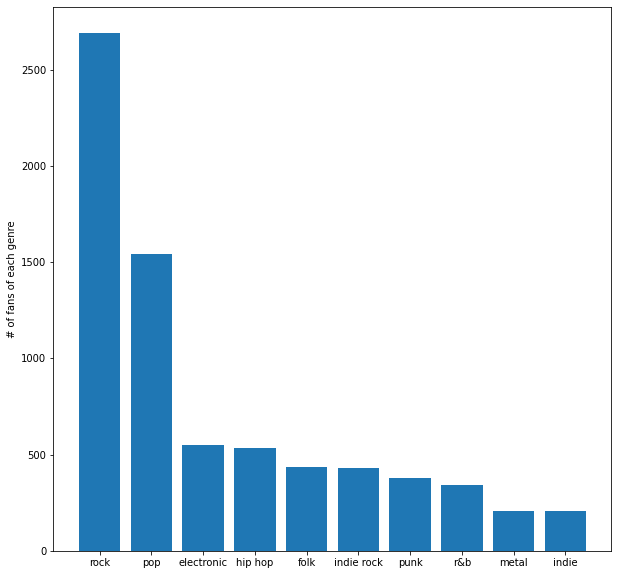

In [50]:
fig , ax = plt.subplots(nrows = 1, ncols = 1, figsize = ((10,10)))
plt.bar(labels, counts)
plt.ylabel('# of fans of each genre')
plt.show()